In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime

# Data
## NASDAQ

In [15]:
nasdaq_df = pd.read_csv('data_stocks_nasdaq.csv')
nasdaq_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-10-02,2257.000000,2262.669922,2235.679932,2237.600098,2237.600098,1769170000
1,2006-10-03,2233.010010,2251.860107,2224.209961,2243.649902,2243.649902,1946800000
2,2006-10-04,2239.879883,2290.979980,2239.260010,2290.949951,2290.949951,2190280000
3,2006-10-05,2289.530029,2306.350098,2287.610107,2306.340088,2306.340088,1911090000
4,2006-10-06,2296.149902,2306.280029,2289.989990,2299.989990,2299.989990,1672470000


In [9]:
nasdaq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2769 entries, 0 to 2768
Data columns (total 7 columns):
Date         2769 non-null object
Open         2769 non-null float64
High         2769 non-null float64
Low          2769 non-null float64
Close        2769 non-null float64
Adj Close    2769 non-null float64
Volume       2769 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 151.5+ KB


In [16]:
nasdaq_df['Date'] = pd.to_datetime(nasdaq_df['Date'])
nasdaq_df.set_index(['Date'], inplace=True)
nasdaq_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-10-02,2257.000000,2262.669922,2235.679932,2237.600098,2237.600098,1769170000
2006-10-03,2233.010010,2251.860107,2224.209961,2243.649902,2243.649902,1946800000
2006-10-04,2239.879883,2290.979980,2239.260010,2290.949951,2290.949951,2190280000
2006-10-05,2289.530029,2306.350098,2287.610107,2306.340088,2306.340088,1911090000
2006-10-06,2296.149902,2306.280029,2289.989990,2299.989990,2299.989990,1672470000


## Nuclear test dates

In [18]:
test_dates = ['09-10-06',
              '25-05-09',
              '12-02-13',
              '06-01-16',
              '03-09-17',
              '09-09-16']

In [26]:
nasdaq_sep_2017 = nasdaq_df[datetime.datetime(2017, 9, 3):]

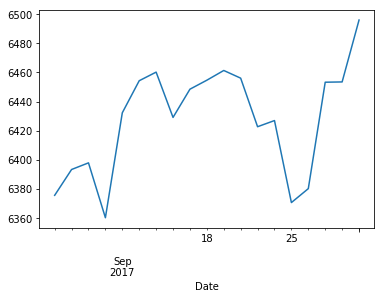

In [33]:
nasdaq_sep_2017['Adj Close'].plot();

In [36]:
returns2017 = nasdaq_sep_2017.apply(lambda x: x / x[0])

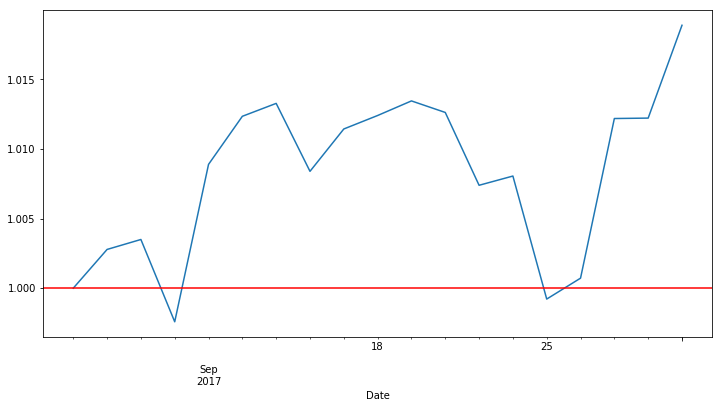

In [43]:
plt.figure(figsize=(12, 6))
returns2017['Adj Close'].plot().axhline(y=1, color='red');

## Visualize all events together

In [44]:
returns = []
for test_date in test_dates:
    start_date = datetime.datetime.strptime(test_date, '%d-%m-%y')
    end_date = start_date + datetime.timedelta(days=14)
    returns.append(nasdaq_df[start_date:end_date].apply(lambda x: x / x[0]))

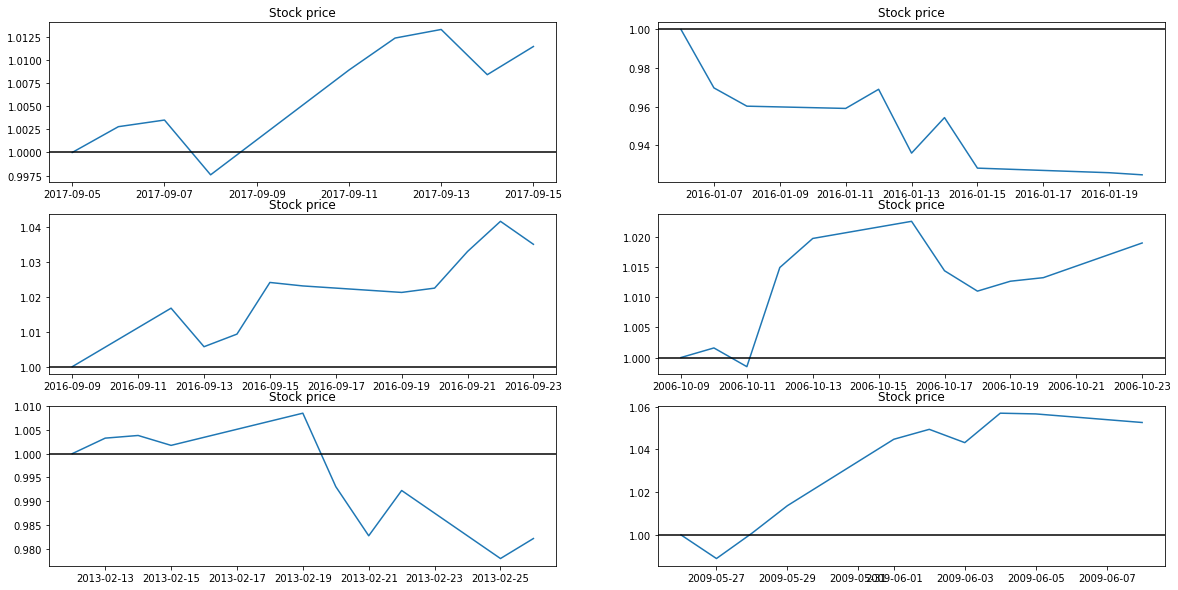

In [49]:
fig, ax = plt.subplots(3, 2, figsize=(20,10))
count = 0
for row in ax:
    for col in row:
        col.plot(returns[count]['Adj Close'])
        col.set_title('Stock price')
        col.axhline(y=1, color='black')
        count += 1
plt.tight_layout        
plt.show();